from scipy import spatial
import numpy as np
import math
!pip install pandas
import pandas as pd
!pip install geopandas
import geopandas as gpd
from pyproj import Transformer
from quadtree import Point, Rect, QuadTree
!pip install matplotlib

In [2]:
#Project Aim:
#To locate starbucks store locations within a 3-mile radius of Willis Tower city center
#To determine runtime of 3 different querying methods to find locate these stores: list, quadtree, and tree.

In [3]:
#Import dataset: starbucks_directory.csv
#Convert pandas dataframe to geopandas GeoDataFrame by using lat and lon columns as geometries
#Specify coordinate system (WGS84) and convert to Web Mercator Projection
df = pd.read_csv("starbucks_directory.csv")

gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=
                    gpd.points_from_xy(x=df.Longitude, y=df.Latitude)).to_crs("EPSG:3395")

<Axes: >

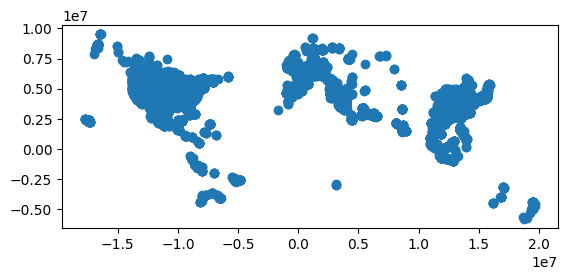

In [4]:
#Plot just to check-in on how things are looking
gdf.plot()

In [5]:
#Project origin (Willis Tower) coordinates to our map
#Specify search radius
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3395")
willis_tower = transformer.transform(41.878936184393915, -87.63601854083217)

search_radius = 0.5*1000*4.82803 #3 miles

In [6]:
coords = np.array(list(zip(gdf.geometry.x,gdf.geometry.y)))

In [7]:
tree = spatial.KDTree(coords)
rslt_index_kd_tree = tree.query_ball_point(willis_tower, search_radius)

In [8]:
rslt_index_kd_tree

[19528,
 19540,
 19538,
 19539,
 19541,
 19548,
 19544,
 19545,
 19546,
 19551,
 19550,
 19549,
 19542,
 19552,
 19547,
 19553,
 19543,
 19587,
 19586,
 19588,
 19532,
 19531,
 19530,
 19529,
 19559,
 19558,
 19561,
 19557,
 19560,
 19564,
 19569,
 19562,
 19566,
 19556,
 19570,
 19565,
 19571,
 19555,
 19568,
 19567,
 19572,
 19563,
 19554,
 19575,
 19573,
 19574,
 19593,
 19592,
 19591,
 19589,
 19594,
 19595,
 19596,
 19597,
 19590,
 19598]

In [9]:
gdf.iloc[rslt_index_kd_tree,]

,Brand,Store Name,Street Address,City,State/Province,Country,Longitude,Latitude,geometry
19528,Starbucks,Roosevelt & Canal - South Loop,"1101 South Canal St., Suite 100",Chicago,IL,US,-87.64,41.87,POINT (-9756040.173 5112999.291)
19540,Starbucks,Halstead & Monroe - Greek Town,"116 S. Halsted St. #E, Corner of Madison & Morgan",Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19538,Starbucks,Target Chicago T-2781,1101 W Jackson Blvd,Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19539,Starbucks,Randolph & Morgan - West Loop,946 W. Randolph St.,Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19541,Starbucks,Madison & Morgan,1001A West Madison Avenue,Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19548,Starbucks,227 W. Monroe - AT&T Building,227 W. Monroe,Chicago,IL,US,-87.64,41.88,POINT (-9756040.173 5114488.743)
19544,Starbucks,150 North Wacker Drive,150 N Wacker,Chicago,IL,US,-87.64,41.88,POINT (-9756040.173 5114488.743)
19545,Starbucks,303 W. Madison,303 West Madison,Chicago,IL,US,-87.64,41.88,POINT (-9756040.173 5114488.743)
19546,Starbucks,550 W. Van Buren,"550 W Van Buren, Circular Building 6",Chicago,IL,US,-87.64,41.88,POINT (-9756040.173 5114488.743)
19551,Starbucks,311 S. Wacker,"311 S. Wacker Dr., Suite 110",Chicago,IL,US,-87.64,41.88,POINT (-9756040.173 5114488.743)


In [10]:
def eu_dist(pt_1, pt_2):
    dist = math.sqrt(((pt_1[0]-pt_2[0])**2)+((pt_1[1]-pt_2[1])**2))
    return dist

def list_query(coords, pt, dist):
    rslt = []
    for i in range(len(coords)):
        if eu_dist(coords[i], pt) <= dist:
            rslt.append(i)
    return rslt

In [11]:
rslt_index_list = list_query(coords, willis_tower, search_radius)

In [12]:
gdf.iloc[rslt_index_list,]

,Brand,Store Name,Street Address,City,State/Province,Country,Longitude,Latitude,geometry
19528,Starbucks,Roosevelt & Canal - South Loop,"1101 South Canal St., Suite 100",Chicago,IL,US,-87.64,41.87,POINT (-9756040.173 5112999.291)
19529,Starbucks,Target Chicago South Loop T-1889,1154 S Clark Street,Chicago,IL,US,-87.63,41.87,POINT (-9754926.978 5112999.291)
19530,Starbucks,555 S. Dearborn - Dearborn Park,555 S. Dearborn,Chicago,IL,US,-87.63,41.87,POINT (-9754926.978 5112999.291)
19531,Starbucks,Roosevelt & Wabash,"31 East Roosevelt Road, ABS #3345",Chicago,IL,US,-87.63,41.87,POINT (-9754926.978 5112999.291)
19532,Starbucks,"The Blackstone, A Renaissance Hotel",636 S Michigan Ave,Chicago,IL,US,-87.62,41.87,POINT (-9753813.783 5112999.291)
19538,Starbucks,Target Chicago T-2781,1101 W Jackson Blvd,Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19539,Starbucks,Randolph & Morgan - West Loop,946 W. Randolph St.,Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19540,Starbucks,Halstead & Monroe - Greek Town,"116 S. Halsted St. #E, Corner of Madison & Morgan",Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19541,Starbucks,Madison & Morgan,1001A West Madison Avenue,Chicago,IL,US,-87.65,41.88,POINT (-9757153.368 5114488.743)
19542,Starbucks,Washington & Clinton,40 N. Clinton St.,Chicago,IL,US,-87.64,41.88,POINT (-9756040.173 5114488.743)


In [13]:
from quadtree import Point, Rect, QuadTree

box = np.max(coords,axis=0) - np.min(coords,axis=0)
center = np.mean(coords,axis=0)

qtree = QuadTree(Rect(center[0], center[1], box[0], box[1]))

for i in range(len(coords)):
    point = Point(coords[i][0],coords[i][1],label=df["Store Name"][i])
    qtree.insert(point)

qtree.query_radius(willis_tower, search_radius, [])

[(-9756040.173122495, 5112999.290507833): 'Roosevelt & Canal - South Loop',
 (-9754926.978214562, 5112999.290507833): 'Target Chicago South Loop T-1889',
 (-9754926.978214562, 5112999.290507833): '555 S. Dearborn - Dearborn Park',
 (-9754926.978214562, 5112999.290507833): 'Roosevelt & Wabash',
 (-9753813.78330663, 5112999.290507833): 'The Blackstone, A Renaissance Hotel',
 (-9757153.368030429, 5114488.743303375): 'Target Chicago T-2781',
 (-9757153.368030429, 5114488.743303375): 'Randolph & Morgan - West Loop',
 (-9757153.368030429, 5114488.743303375): 'Halstead & Monroe - Greek Town',
 (-9757153.368030429, 5114488.743303375): 'Madison & Morgan',
 (-9756040.173122495, 5114488.743303375): 'Washington & Clinton',
 (-9756040.173122495, 5114488.743303375): 'Two North Riverside Plaza',
 (-9756040.173122495, 5114488.743303375): '150 North Wacker Drive',
 (-9756040.173122495, 5114488.743303375): '303 W. Madison',
 (-9756040.173122495, 5114488.743303375): '550 W. Van Buren',
 (-9756040.1731224

In [14]:
#Finally, compare speed of the list, quadtree, and tree querying methods
#We use %timeit to do this

In [15]:
#List query take ~27.8 ms
%timeit list_query(coords, willis_tower, search_radius)

24.1 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
#Quadtree query takes ~237 microseconds
%timeit qtree.query_radius(willis_tower, search_radius, [])

252 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
#Tree query takes ~11.8 microseconds
%timeit tree.query_ball_point(willis_tower, search_radius)

12.4 µs ± 447 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
